In [1]:
import pandas as pd
import numpy as np
import ast 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("raw.csv")

In [3]:
pd.set_option('mode.chained_assignment', None)

### Data Cleaning and Preparation

In [4]:
data.shape

(21983, 30)

In [5]:
data.head()

,REGISTRATION_DATE,REGISTRATION_COUNTRY,PURCHASE_COUNT,PURCHASE_COUNT_DELIVERY,PURCHASE_COUNT_TAKEAWAY,FIRST_PURCHASE_DAY,LAST_PURCHASE_DAY,USER_ID,BREAKFAST_PURCHASES,LUNCH_PURCHASES,...,WEB_PURCHASES,ANDROID_PURCHASES,PREFERRED_RESTAURANT_TYPES,USER_HAS_VALID_PAYMENT_METHOD,MOST_COMMON_HOUR_OF_THE_DAY_TO_PURCHASE,MOST_COMMON_WEEKDAY_TO_PURCHASE,AVG_DAYS_BETWEEN_PURCHASES,MEDIAN_DAYS_BETWEEN_PURCHASES,AVERAGE_DELIVERY_DISTANCE_KMS,PURCHASE_COUNT_BY_STORE_TYPE
0,2019-09-01 00:00:00.000,DNK,0,NaN,NaN,NaN,NaN,1,NaN,NaN,...,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,"{\n ""General merchandise"": 0,\n ""Grocery"": 0..."
1,2019-09-01 00:00:00.000,FIN,1,1.0,0.0,2020-09-02 00:00:00.000,2020-09-02 00:00:00.000,2,0.0,1.0,...,0.0,1.0,NaN,False,23.0,2.0,NaN,NaN,6.853,"{\n ""General merchandise"": 0,\n ""Grocery"": 0..."
2,2019-09-01 00:00:00.000,DNK,19,19.0,0.0,2019-12-10 00:00:00.000,2020-05-25 00:00:00.000,3,0.0,4.0,...,19.0,0.0,NaN,True,21.0,2.0,9.0,3.0,6.559,"{\n ""General merchandise"": 1,\n ""Grocery"": 9..."
3,2019-09-01 00:00:00.000,FIN,0,NaN,NaN,NaN,NaN,4,NaN,NaN,...,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,"{\n ""General merchandise"": 0,\n ""Grocery"": 0..."
4,2019-09-01 00:00:00.000,GRC,0,NaN,NaN,NaN,NaN,5,NaN,NaN,...,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,"{\n ""General merchandise"": 0,\n ""Grocery"": 0..."


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21983 entries, 0 to 21982
Data columns (total 30 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   REGISTRATION_DATE                        21983 non-null  object 
 1   REGISTRATION_COUNTRY                     21983 non-null  object 
 2   PURCHASE_COUNT                           21983 non-null  int64  
 3   PURCHASE_COUNT_DELIVERY                  12028 non-null  float64
 4   PURCHASE_COUNT_TAKEAWAY                  12028 non-null  float64
 5   FIRST_PURCHASE_DAY                       11964 non-null  object 
 6   LAST_PURCHASE_DAY                        12027 non-null  object 
 7   USER_ID                                  21983 non-null  int64  
 8   BREAKFAST_PURCHASES                      12028 non-null  float64
 9   LUNCH_PURCHASES                          12028 non-null  float64
 10  EVENING_PURCHASES                        12028

##### Creating a copy of the data.. let's keep the raw version as a reference if things go wrong

In [7]:
cleaned = data.copy()
cleaned.columns = cleaned.columns.str.lower()
cleaned = cleaned.set_index('user_id')

In [8]:
cleaned

,registration_date,registration_country,purchase_count,purchase_count_delivery,purchase_count_takeaway,first_purchase_day,last_purchase_day,breakfast_purchases,lunch_purchases,evening_purchases,...,web_purchases,android_purchases,preferred_restaurant_types,user_has_valid_payment_method,most_common_hour_of_the_day_to_purchase,most_common_weekday_to_purchase,avg_days_between_purchases,median_days_between_purchases,average_delivery_distance_kms,purchase_count_by_store_type
user_id,,,,,,,,,,,,,,,,,,,,,
1,2019-09-01 00:00:00.000,DNK,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,"{\n ""General merchandise"": 0,\n ""Grocery"": 0..."
2,2019-09-01 00:00:00.000,FIN,1,1.0,0.0,2020-09-02 00:00:00.000,2020-09-02 00:00:00.000,0.0,1.0,0.0,...,0.0,1.0,NaN,False,23.0,2.0,NaN,NaN,6.853,"{\n ""General merchandise"": 0,\n ""Grocery"": 0..."
3,2019-09-01 00:00:00.000,DNK,19,19.0,0.0,2019-12-10 00:00:00.000,2020-05-25 00:00:00.000,0.0,4.0,1.0,...,19.0,0.0,NaN,True,21.0,2.0,9.0,3.0,6.559,"{\n ""General merchandise"": 1,\n ""Grocery"": 9..."
4,2019-09-01 00:00:00.000,FIN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,"{\n ""General merchandise"": 0,\n ""Grocery"": 0..."
5,2019-09-01 00:00:00.000,GRC,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,"{\n ""General merchandise"": 0,\n ""Grocery"": 0..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21979,2019-09-30 00:00:00.000,GRC,1,1.0,0.0,2020-01-23 00:00:00.000,2020-01-23 00:00:00.000,0.0,0.0,1.0,...,0.0,1.0,NaN,False,12.0,2.0,NaN,NaN,1.383,"{\n ""General merchandise"": 0,\n ""Grocery"": 0..."
21980,2019-09-30 00:00:00.000,GRC,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,"{\n ""General merchandise"": 0,\n ""Grocery"": 0..."
21981,2019-09-30 00:00:00.000,DNK,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,"{\n ""General merchandise"": 0,\n ""Grocery"": 0..."


##### It is easier performing analysis on numeric values

In [9]:
cleaned['user_has_valid_payment_method'] = cleaned['user_has_valid_payment_method'].astype('int64')
cleaned.user_has_valid_payment_method.head()

user_id
1    0
2    0
3    1
4    0
5    0
Name: user_has_valid_payment_method, dtype: int64

In [10]:
cleaned.select_dtypes(object)

,registration_date,registration_country,first_purchase_day,last_purchase_day,preferred_device,preferred_restaurant_types,purchase_count_by_store_type
user_id,,,,,,,
1,2019-09-01 00:00:00.000,DNK,NaN,NaN,ios,NaN,"{\n ""General merchandise"": 0,\n ""Grocery"": 0..."
2,2019-09-01 00:00:00.000,FIN,2020-09-02 00:00:00.000,2020-09-02 00:00:00.000,android,NaN,"{\n ""General merchandise"": 0,\n ""Grocery"": 0..."
3,2019-09-01 00:00:00.000,DNK,2019-12-10 00:00:00.000,2020-05-25 00:00:00.000,android,NaN,"{\n ""General merchandise"": 1,\n ""Grocery"": 9..."
4,2019-09-01 00:00:00.000,FIN,NaN,NaN,android,NaN,"{\n ""General merchandise"": 0,\n ""Grocery"": 0..."
5,2019-09-01 00:00:00.000,GRC,NaN,NaN,android,NaN,"{\n ""General merchandise"": 0,\n ""Grocery"": 0..."
...,...,...,...,...,...,...,...
21979,2019-09-30 00:00:00.000,GRC,2020-01-23 00:00:00.000,2020-01-23 00:00:00.000,android,NaN,"{\n ""General merchandise"": 0,\n ""Grocery"": 0..."
21980,2019-09-30 00:00:00.000,GRC,NaN,NaN,NaN,NaN,"{\n ""General merchandise"": 0,\n ""Grocery"": 0..."
21981,2019-09-30 00:00:00.000,DNK,NaN,NaN,android,NaN,"{\n ""General merchandise"": 0,\n ""Grocery"": 0..."


##### Reverting the mentioned column to the structure that was meant to be: a dictionary!

In [11]:
purchases_by_store_types = cleaned['purchase_count_by_store_type']
purchases_by_store_types = purchases_by_store_types.apply(lambda x: ast.literal_eval(x.replace('\n', '').replace(' ', '')))
cleaned['purchase_count_by_store_type'] = purchases_by_store_types

##### Same thing: obtaining the list of preferred cuisines that was meant to be

In [12]:
preferred_cuisines = cleaned['preferred_restaurant_types'].copy()
preferred_cuisines = preferred_cuisines.apply(lambda x: ast.literal_eval(x.replace('\n', '').replace(' ', ''))if isinstance(x, str) else x)
cleaned['preferred_restaurant_types'] = preferred_cuisines

##### Making sure dates are dates. (Dates 😉)

In [13]:
date_columns = ['registration_date'	, 'first_purchase_day',	'last_purchase_day']
for col in date_columns:
    cleaned[col] = pd.to_datetime(cleaned[col])

In [14]:
cleaned[date_columns].head()

,registration_date,first_purchase_day,last_purchase_day
user_id,,,
1,2019-09-01,NaT,NaT
2,2019-09-01,2020-09-02,2020-09-02
3,2019-09-01,2019-12-10,2020-05-25
4,2019-09-01,NaT,NaT
5,2019-09-01,NaT,NaT


##### It is easier performing string manipulation on string dtypes than objects

In [15]:
string_columns = ['preferred_device', 'registration_country']
for x in string_columns: 
    cleaned[x] = cleaned[x].astype('string')

In [16]:
cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21983 entries, 1 to 21983
Data columns (total 29 columns):
 #   Column                                   Non-Null Count  Dtype         
---  ------                                   --------------  -----         
 0   registration_date                        21983 non-null  datetime64[ns]
 1   registration_country                     21983 non-null  string        
 2   purchase_count                           21983 non-null  int64         
 3   purchase_count_delivery                  12028 non-null  float64       
 4   purchase_count_takeaway                  12028 non-null  float64       
 5   first_purchase_day                       11964 non-null  datetime64[ns]
 6   last_purchase_day                        12027 non-null  datetime64[ns]
 7   breakfast_purchases                      12028 non-null  float64       
 8   lunch_purchases                          12028 non-null  float64       
 9   evening_purchases                        120

#### Handling Missing Values

##### Dropping null rows

In [17]:
cleaned = cleaned[cleaned['first_purchase_day'].notnull()] 
cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11964 entries, 2 to 21983
Data columns (total 29 columns):
 #   Column                                   Non-Null Count  Dtype         
---  ------                                   --------------  -----         
 0   registration_date                        11964 non-null  datetime64[ns]
 1   registration_country                     11964 non-null  string        
 2   purchase_count                           11964 non-null  int64         
 3   purchase_count_delivery                  11964 non-null  float64       
 4   purchase_count_takeaway                  11964 non-null  float64       
 5   first_purchase_day                       11964 non-null  datetime64[ns]
 6   last_purchase_day                        11964 non-null  datetime64[ns]
 7   breakfast_purchases                      11964 non-null  float64       
 8   lunch_purchases                          11964 non-null  float64       
 9   evening_purchases                        119

##### Replacing the null records with the list [not mentioned]

In [18]:
preferred_cuisines = preferred_cuisines.fillna(value='["not mentioned"]')
preferred_cuisines = preferred_cuisines.apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)
cleaned['preferred_restaurant_types'] = preferred_cuisines
cleaned['preferred_restaurant_types']

user_id
2        [not mentioned]
3        [not mentioned]
8        [not mentioned]
13       [not mentioned]
14            [american]
              ...       
21974    [not mentioned]
21976    [not mentioned]
21977    [not mentioned]
21979    [not mentioned]
21983    [not mentioned]
Name: preferred_restaurant_types, Length: 11964, dtype: object

##### Checking whether it is possible to update both fields simultaneously (if null records are paralleled)

In [19]:
avg_days = cleaned['avg_days_between_purchases'].isna()
median_days = cleaned['median_days_between_purchases'].isna()
avg_days.corr(median_days)

1.0

##### Filling in the missing values 

In [20]:
# Replacing the null records with zeros will lead to biased estimate of the purchase frequency(calculatd later) 
# We shall adopt the forward-fill approach instead. This technique is less likely to introduce bias in the data trend, 
# as missing values are to be replaced with a spectrum of diverse values instead of one constant value.
# After carrying out the forward-fill, there will still be a few null records(The very first records, since they had no preceding values to replace them)
# Replacing those few values with zeros will cause no harm. 

cleaned[['avg_days_between_purchases', 'median_days_between_purchases']] = cleaned[['avg_days_between_purchases', 'median_days_between_purchases']].ffill()
cleaned[['avg_days_between_purchases', 'median_days_between_purchases']] = cleaned[['avg_days_between_purchases', 'median_days_between_purchases']].fillna(0)
cleaned[['avg_days_between_purchases', 'median_days_between_purchases']] 

,avg_days_between_purchases,median_days_between_purchases
user_id,,
2,0.0,0.0
3,9.0,3.0
8,9.0,3.0
13,11.0,9.0
14,19.0,19.0
...,...,...
21974,32.0,7.0
21976,5.0,5.0
21977,5.0,5.0


In [21]:
cleaned[['avg_days_between_purchases', 'median_days_between_purchases']] = cleaned[['avg_days_between_purchases', 'median_days_between_purchases']].fillna(0)
cleaned[['avg_days_between_purchases', 'median_days_between_purchases']] 

,avg_days_between_purchases,median_days_between_purchases
user_id,,
2,0.0,0.0
3,9.0,3.0
8,9.0,3.0
13,11.0,9.0
14,19.0,19.0
...,...,...
21974,32.0,7.0
21976,5.0,5.0
21977,5.0,5.0


### Exploratory Analysis

##### Retrieving the purchases made in each store type

In [22]:
df = [{'user_id': user, **stores['purchase_count_by_store_type']} for user, stores in cleaned.iterrows()]
store_type_purchases = pd.DataFrame(df).set_index('user_id') 
store_type_purchases.sum()

Generalmerchandise     1440
Grocery               12695
Petsupplies             175
Restaurant            44540
Retailstore           14502
dtype: int64

Text(0.5, 1.0, 'Store Type Purchases')

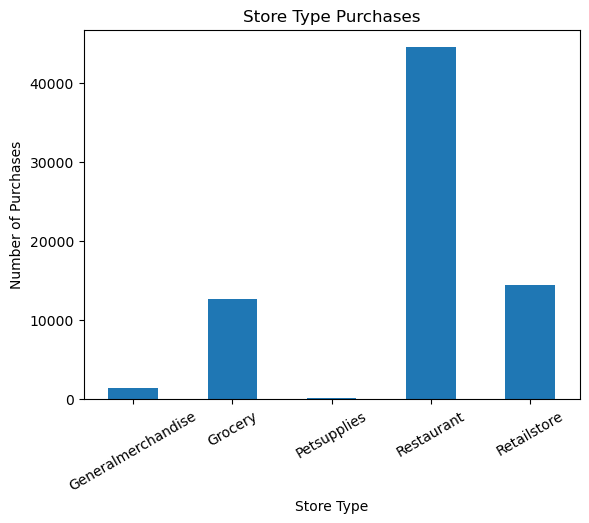

In [23]:
store_type_purchases.sum().plot(kind='bar', rot=30)
plt.xlabel('Store Type')
plt.ylabel('Number of Purchases')
plt.title('Store Type Purchases')

##### Getting the number of purchases made in each store category per country

In [24]:
country_store_purchases = pd.merge(store_type_purchases, cleaned['registration_country'], left_index=True, right_index=True).groupby('registration_country').sum()
country_store_purchases

,Generalmerchandise,Grocery,Petsupplies,Restaurant,Retailstore
registration_country,,,,,
ARE,0,0,0,2,0
CAN,0,0,0,5,0
CYP,0,0,0,3,0
CZE,0,17,1,25,3
DEU,0,0,0,2,0
DNK,587,4671,61,17420,5342
EST,3,13,0,49,20
FIN,687,6184,84,20749,6888
FRA,0,0,0,3,0


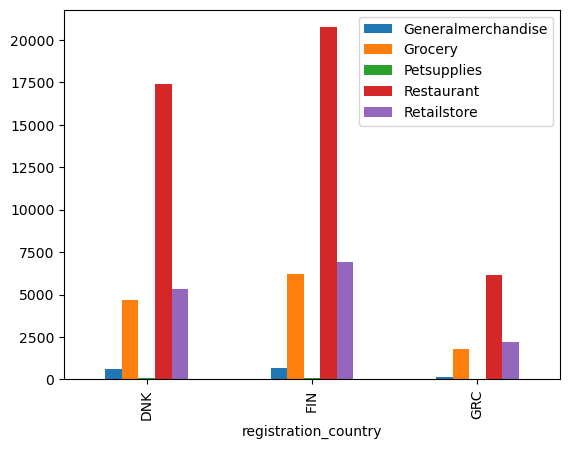

In [25]:
country_store_purchases.loc[['DNK','FIN','GRC']].plot(kind='bar')
plt.grid(False)

##### Getting the preferred cuisine counts per country

In [26]:
country_preferred_cuisines = cleaned[['registration_country','preferred_restaurant_types']] 
cuisines_exploded = country_preferred_cuisines.explode('preferred_restaurant_types')
cuisines_encoded = pd.get_dummies(cuisines_exploded, columns=['preferred_restaurant_types'], prefix='cuisine')
country_cuisine_counts = cuisines_encoded.set_index('registration_country')
country_cuisine_counts = country_cuisine_counts.astype('int64').groupby('registration_country').sum().drop('cuisine_not mentioned', axis=1)

In [27]:
country_cuisine_counts

,cuisine_american,cuisine_chinese,cuisine_greek,cuisine_hawaiian,cuisine_indian,cuisine_italian,cuisine_japanese,cuisine_korean,cuisine_mexican,cuisine_middleeastern,cuisine_nepalese,cuisine_spanish,cuisine_thai,cuisine_vietnamese
registration_country,,,,,,,,,,,,,,
ARE,0,0,0,0,0,0,0,0,0,0,0,0,0,0
CAN,0,0,0,0,0,0,0,0,0,0,0,0,0,0
CYP,0,0,0,0,0,0,0,0,0,0,0,0,0,0
CZE,1,0,0,0,0,1,0,0,0,0,0,0,0,0
DEU,0,0,0,0,0,0,0,0,0,0,0,0,0,0
DNK,496,15,4,21,70,392,392,46,191,26,0,1,30,36
EST,3,0,0,0,2,2,2,0,0,1,0,0,0,0
FIN,751,14,15,3,155,513,253,2,269,197,6,0,37,16
FRA,0,0,0,0,0,0,0,0,0,0,0,0,0,0


##### Plotting the distribution of mentioned cuisines

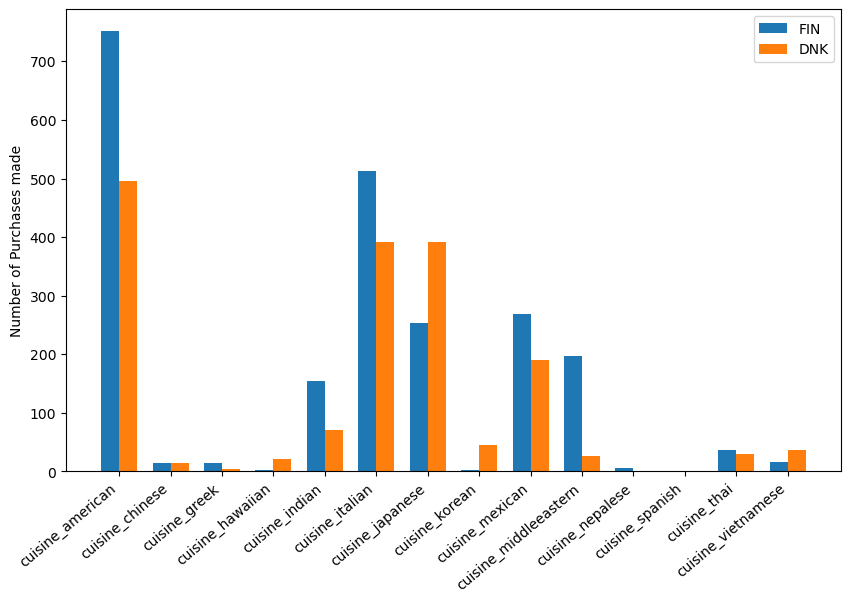

In [28]:
fig, ax = plt.subplots(figsize=(10, 6))

bar_width = 0.35
index = np.arange(len(country_cuisine_counts.columns))

bar1 = ax.bar(index, country_cuisine_counts.loc['FIN'], bar_width, label='FIN')
bar2 = ax.bar(index + bar_width, country_cuisine_counts.loc['DNK'], bar_width, label='DNK')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(country_cuisine_counts.columns, rotation=40, ha='right')
ax.set_ylabel('Number of Purchases made')
ax.legend()
plt.grid(False)
plt.show()

##### Purchases summary

In [29]:
purchases_summary = cleaned[['breakfast_purchases', 'lunch_purchases',
                             'evening_purchases', 'dinner_purchases',
                             'late_night_purchases', 'total_purchases_eur']].agg(['count','mean','std','min','max','sum']).round()
purchases_summary

,breakfast_purchases,lunch_purchases,evening_purchases,dinner_purchases,late_night_purchases,total_purchases_eur
count,11964.0,11964.0,11964.0,11964.0,11964.0,11964.0
mean,0.0,2.0,0.0,3.0,0.0,176.0
std,1.0,6.0,2.0,5.0,0.0,300.0
min,0.0,0.0,0.0,0.0,0.0,1.0
max,52.0,171.0,71.0,104.0,0.0,7980.0
sum,2327.0,28509.0,5926.0,36317.0,0.0,2111318.0


##### Average days between placing orders

In [30]:
days_summary = cleaned[['avg_days_between_purchases', 'median_days_between_purchases']].agg({
    'avg_days_between_purchases': 'mean', 
    'median_days_between_purchases': 'median'}).round()
days_summary

avg_days_between_purchases       64.0
median_days_between_purchases    25.0
dtype: float64

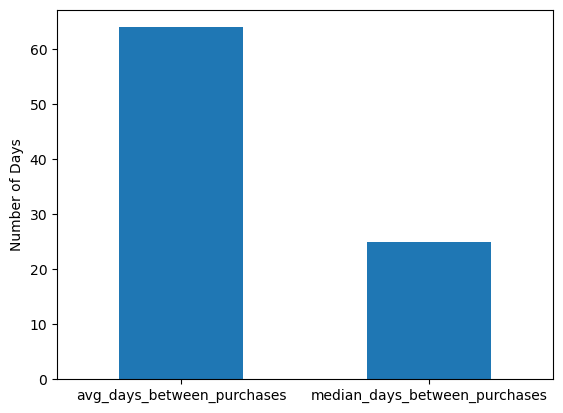

In [31]:
days_summary.plot(kind='bar', rot=0)
plt.ylabel('Number of Days')
plt.grid(False)

##### Country and Device statistics

In [32]:
days_summary_country = pd.pivot_table(cleaned,
                                      values=['avg_days_between_purchases', 'purchase_count','most_common_weekday_to_purchase'],
                                      index=['preferred_device', 'registration_country'],
                                      aggfunc={'avg_days_between_purchases': 'mean', 'purchase_count':'sum', 'most_common_weekday_to_purchase': 'max'}
                                     ).round()
days_summary_country

avg_days_between_purchases  \
preferred_device registration_country                               
android          CZE                                         44.0   
                 DNK                                         64.0   
                 EST                                         50.0   
                 FIN                                         64.0   
                 GRC                                         57.0   
                 HUN                                         60.0   
                 ISR                                         81.0   
                 LTU                                         18.0   
                 LVA                                         58.0   
                 NOR                                         85.0   
                 POL                                        199.0   
                 SWE                                        316.0   
ios              ARE                                         14.0   
                 CAN                                         31.0   
                 CYP                                         29.0   
                 CZE                                         12.0   
                 DEU                                          3.0   
                 DNK                                         65.0   
                 EST                                         77.0   
                 FIN                                         63.0   
                 FRA                                         14.0   
                 GBR                                          5.0   
                 GRC                                         53.0   
                 HUN                                         86.0   
                 ISR                                        106.0   
                 LVA                                         13.0   
                 NOR                                         58.0   
                 POL                                         67.0   
                 SWE                                        186.0   
web              DNK                                         71.0   
                 EST                                         63.0   
                 FIN                                         64.0   
                 GRC                                         52.0   
                 HRV                                         62.0   
                 LTU                                         77.0   
                 LVA                                         91.0   

                                       most_common_weekday_to_purchase  \
preferred_device registration_country                                    
android          CZE                                               5.0   
                 DNK                                               7.0   
                 EST                                               6.0   
                 FIN                                               7.0   
                 GRC                                               7.0   
                 HUN                                               6.0   
                 ISR                                               7.0   
                 LTU                                               4.0   
                 LVA                                               3.0   
                 NOR                                               7.0   
                 POL                                               7.0   
                 SWE                                               3.0   
ios              ARE                                               5.0   
                 CAN                                               6.0   
                 CYP                                               5.0   
                 CZE                                               3.0   
                 DEU                                               4.0   
          

### Segmentation Analysis

##### Segments of the variable Total Purchases

In [33]:
low_spenders = cleaned[cleaned['total_purchases_eur'] < 100]
medium_spenders = cleaned[(cleaned['total_purchases_eur'] > 100) & (cleaned['total_purchases_eur'] < 500)]
high_spenders = cleaned[cleaned['total_purchases_eur'] > 500]

##### Segments of the variable Frequency

In [34]:
bins = [0, 7, 14, float('inf')]  

frequent_users = cleaned[cleaned['avg_days_between_purchases'].between(bins[0], bins[1], inclusive='left')]
moderate_users = cleaned[cleaned['avg_days_between_purchases'].between(bins[1], bins[2], inclusive='left')]
infrequent_users = cleaned[cleaned['avg_days_between_purchases'].gt(bins[2])]

frequent_users.head()

,registration_date,registration_country,purchase_count,purchase_count_delivery,purchase_count_takeaway,first_purchase_day,last_purchase_day,breakfast_purchases,lunch_purchases,evening_purchases,...,web_purchases,android_purchases,preferred_restaurant_types,user_has_valid_payment_method,most_common_hour_of_the_day_to_purchase,most_common_weekday_to_purchase,avg_days_between_purchases,median_days_between_purchases,average_delivery_distance_kms,purchase_count_by_store_type
user_id,,,,,,,,,,,,,,,,,,,,,
2,2019-09-01,FIN,1,1.0,0.0,2020-09-02,2020-09-02,0.0,1.0,0.0,...,0.0,1.0,[not mentioned],0,23.0,2.0,0.0,0.0,6.853,"{'Generalmerchandise': 0, 'Grocery': 0, 'Petsu..."
40,2019-09-01,FIN,3,3.0,0.0,2019-11-03,2019-11-13,0.0,2.0,0.0,...,0.0,3.0,[middleeastern],1,1.0,3.0,5.0,5.0,1.566,"{'Generalmerchandise': 0, 'Grocery': 0, 'Petsu..."
42,2019-09-01,DNK,1,1.0,0.0,2020-06-15,2020-06-15,0.0,1.0,0.0,...,0.0,0.0,[not mentioned],0,7.0,4.0,5.0,5.0,4.550,"{'Generalmerchandise': 0, 'Grocery': 0, 'Petsu..."
54,2019-09-01,FIN,2,2.0,0.0,2019-09-02,2019-09-03,0.0,0.0,0.0,...,0.0,2.0,[not mentioned],1,13.0,5.0,1.0,1.0,6.934,"{'Generalmerchandise': 0, 'Grocery': 0, 'Petsu..."
55,2019-09-01,GRC,1,1.0,0.0,2019-09-01,2019-09-01,1.0,0.0,0.0,...,0.0,1.0,[not mentioned],0,23.0,1.0,1.0,1.0,3.596,"{'Generalmerchandise': 0, 'Grocery': 0, 'Petsu..."


##### Segments of the variable preferred device

In [35]:
ios_users = cleaned[cleaned['preferred_device'] == 'ios']
android_users = cleaned[cleaned['preferred_device'] == 'android']
web_users = cleaned[cleaned['preferred_device'] == 'web']

In [36]:
android_users

,registration_date,registration_country,purchase_count,purchase_count_delivery,purchase_count_takeaway,first_purchase_day,last_purchase_day,breakfast_purchases,lunch_purchases,evening_purchases,...,web_purchases,android_purchases,preferred_restaurant_types,user_has_valid_payment_method,most_common_hour_of_the_day_to_purchase,most_common_weekday_to_purchase,avg_days_between_purchases,median_days_between_purchases,average_delivery_distance_kms,purchase_count_by_store_type
user_id,,,,,,,,,,,,,,,,,,,,,
2,2019-09-01,FIN,1,1.0,0.0,2020-09-02,2020-09-02,0.0,1.0,0.0,...,0.0,1.0,[not mentioned],0,23.0,2.0,0.0,0.0,6.853,"{'Generalmerchandise': 0, 'Grocery': 0, 'Petsu..."
3,2019-09-01,DNK,19,19.0,0.0,2019-12-10,2020-05-25,0.0,4.0,1.0,...,19.0,0.0,[not mentioned],1,21.0,2.0,9.0,3.0,6.559,"{'Generalmerchandise': 1, 'Grocery': 9, 'Petsu..."
8,2019-09-01,FIN,1,1.0,0.0,2020-10-14,2020-10-14,0.0,0.0,1.0,...,0.0,1.0,[not mentioned],1,5.0,1.0,9.0,3.0,1.251,"{'Generalmerchandise': 0, 'Grocery': 0, 'Petsu..."
17,2019-09-01,FIN,7,5.0,2.0,2019-12-05,2020-10-31,0.0,5.0,0.0,...,0.0,7.0,[american],1,10.0,1.0,55.0,56.0,4.903,"{'Generalmerchandise': 1, 'Grocery': 3, 'Petsu..."
22,2019-09-01,FIN,4,4.0,0.0,2019-10-27,2020-07-08,0.0,0.0,0.0,...,0.0,4.0,[not mentioned],1,1.0,1.0,85.0,96.0,1.609,"{'Generalmerchandise': 0, 'Grocery': 0, 'Petsu..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21972,2019-09-30,GRC,25,25.0,0.0,2019-10-06,2020-10-22,0.0,6.0,10.0,...,0.0,25.0,[not mentioned],1,11.0,5.0,16.0,9.0,2.753,"{'Generalmerchandise': 1, 'Grocery': 12, 'Pets..."
21974,2019-09-30,FIN,1,1.0,0.0,2020-10-15,2020-10-15,0.0,0.0,0.0,...,0.0,1.0,[not mentioned],0,19.0,6.0,32.0,7.0,4.045,"{'Generalmerchandise': 0, 'Grocery': 0, 'Petsu..."
21976,2019-09-30,GRC,4,4.0,0.0,2020-04-11,2020-04-27,2.0,2.0,0.0,...,0.0,4.0,[not mentioned],1,12.0,5.0,5.0,5.0,11.540,"{'Generalmerchandise': 0, 'Grocery': 0, 'Petsu..."


#### Exporting valuable datasets

In [40]:
cleaned.to_csv('cleaned.csv')
store_type_purchases.to_csv('store_type_purchases.csv')
country_store_purchases.to_csv('country_store_purchases.csv')
country_cuisine_counts.to_csv('country_cuisine_counts.csv')